In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import pickle as p
from htmldom import htmldom
import pandas as pd
import os
from bs4 import BeautifulSoup
from datetime import datetime
import validators
import re
from urllib.parse import urlparse
import tldextract
import content_features
import content_features_new
import json
import requests
import url_features
#from googlesearch import search
import time
from subprocess import check_output
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import re
from ipaddress import ip_address, IPv4Address, IPv6Address
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from kydavra import PointBiserialCorrSelector
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt import BayesSearchCV

In [5]:
old_html=pd.read_csv("./Data/sandbox/shared/csv/html_a_int_ext_null_features.csv")

In [152]:
new_html=pd.read_csv("./Data/sandbox/shared/csv/features_final/html_features_phishing_converted.csv")

In [3]:
legit_html=pd.read_csv("./Data/sandbox/shared/csv/features_final/html_features_legit_converted.csv")

In [4]:
legit_html

,html_hl_count_total,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_media_total,html_hl_ratio_media_int,html_hl_ratio_media_ext,html_hl_link_total,html_hl_ratio_link_int,html_hl_ratio_link_ext,html_hl_external_css,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title
0,168,0.815476,0.166667,0.017857,10,1.000000,0.000000,8,0.750000,0.250000,1,0,0,0,0,0,0,1,0,0
1,289,0.885813,0.058824,0.055363,3,0.000000,1.000000,15,1.000000,0.000000,0,0,0,0,0,0,0,1,0,0
2,165,0.624242,0.369697,0.006061,31,0.967742,0.032258,23,0.869565,0.130435,1,0,0,0,0,0,0,1,0,0
3,190,0.910526,0.084211,0.005263,20,1.000000,0.000000,31,0.967742,0.032258,1,0,0,0,0,0,0,1,0,0
4,306,0.983660,0.016340,0.000000,224,1.000000,0.000000,12,0.833333,0.166667,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,171,0.649123,0.339181,0.011696,10,1.000000,0.000000,21,0.857143,0.142857,1,0,0,0,0,0,0,1,0,0
9996,156,0.750000,0.224359,0.025641,15,1.000000,0.000000,5,0.800000,0.200000,1,0,0,0,0,0,0,1,0,0
9997,291,0.934708,0.058419,0.006873,67,1.000000,0.000000,9,1.000000,0.000000,0,0,0,0,0,0,0,1,0,0
9998,212,0.858491,0.132075,0.009434,44,1.000000,0.000000,42,0.666667,0.333333,1,0,0,0,0,0,0,1,0,0


In [151]:
old_html

,html_a_internal_count,html_a_external_count,html_a_null_count,html_a_internal_ratio,html_a_external_ratio,html_a_null_ratio
0,124.0,12.0,3.0,0.892086,0.086331,0.021583
1,232.0,5.0,16.0,0.916996,0.019763,0.063241
2,43.0,48.0,5.0,0.447917,0.500000,0.052083
3,118.0,1.0,1.0,0.983333,0.008333,0.008333
4,44.0,2.0,0.0,0.956522,0.043478,0.000000
...,...,...,...,...,...,...
19995,1.0,20.0,0.0,0.047619,0.952381,0.000000
19996,0.0,0.0,0.0,0.000000,0.000000,0.000000
19997,0.0,0.0,0.0,0.000000,0.000000,0.000000
19998,1.0,10.0,2.0,0.076923,0.769231,0.153846


In [158]:
df_final.drop(columns=['html_hl_count_total','html_hl_media_total','html_hl_link_total'],inplace=True)

In [159]:
df_final

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0,0,0,0,0,0,1,0,0,4
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0,0,0,0,0,0,1,0,0,6
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0,0,0,0,0,0,1,0,0,3
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0,0,0,0,0,0,1,0,0,6
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0,0,0,0,0,0,1,0,0,0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0,0,0,0,0,0,0,0,0,0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
new_html

,html_hl_count_total,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_media_total,html_hl_ratio_media_int,html_hl_ratio_media_ext,html_hl_link_total,html_hl_ratio_link_int,html_hl_ratio_link_ext,html_hl_external_css,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title
0,6,1.000000,0.000000,0.000000,3,1.000000,0.000000,1,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,52,0.365385,0.500000,0.134615,4,0.000000,1.000000,4,0.0,1.0,1,0,0,0,0,0,0,1,0,0
2,26,0.115385,0.846154,0.038462,0,0.000000,0.000000,2,1.0,0.0,0,0,0,0,0,0,0,1,0,0
3,11,0.090909,0.727273,0.181818,3,0.000000,1.000000,1,0.0,1.0,1,0,0,0,0,0,0,1,0,0
4,26,0.115385,0.846154,0.038462,0,0.000000,0.000000,2,1.0,0.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,0.533333,0.466667,0.000000,5,1.000000,0.000000,5,1.0,0.0,0,0,0,0,0,0,0,1,0,0
9996,11,1.000000,0.000000,0.000000,4,1.000000,0.000000,2,1.0,0.0,0,0,0,0,0,0,0,0,0,0
9997,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
9998,37,0.108108,0.837838,0.054054,6,0.000000,1.000000,6,0.0,1.0,1,1,0,0,0,0,0,1,0,0


In [7]:
legit_features=['url_features_legit.csv','html_features_legit_new.csv','external_features_googlepagerank_legit.csv']

In [8]:
phishing_features=['url_features_phishing.csv','html_features_phishing_new.csv','external_features_googlepagerank_phishing.csv']

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
def feature_connection(csv_list):
    for i in range(len(csv_list)):
        print(i)
        if i == 0:
            base=pd.read_csv("./Data/sandbox/shared/csv/features_final/"+ csv_list[i]) 
        else:    
            temp=pd.read_csv("./Data/sandbox/shared/csv/features_final/"+ csv_list[i])
            base=pd.concat([base, temp], axis=1, join='outer')
    return base

In [11]:
def dataframe_append(legit_csv_list,phishing_csv_list):
    legit=feature_connection(legit_csv_list)
    phishing=feature_connection(phishing_csv_list)
    df_final = pd.concat([legit, phishing]).reset_index(drop=True)
    return df_final


In [34]:
df_final=dataframe_append(legit_features,phishing_features)

0
1
2
0
1
2


In [37]:
df_final

,url,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore
0,https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,...,0.0,0.0,0,0,0,0,1,0,0,4
1,https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,...,0.0,0.0,0,0,0,0,1,0,0,6
2,https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,...,0.0,0.0,0,0,0,0,1,0,0,3
3,https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,...,0.0,0.0,0,0,0,0,1,0,0,6
4,https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,...,0.0,0.0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,http://smbc-wy.com,1,0,0,18,1,0,1,2,0,...,0.0,0.0,0,0,0,0,1,0,0,0
19996,http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,...,0.0,0.0,0,0,0,0,0,0,0,0
19997,https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,...,0.0,0.0,0,0,0,0,0,0,0,0
19998,http://xarconentertainment.sexxyfemaledolls.com/js/dirkt.raif/db89165933f546160d78317dd0c29a8c,1,0,23,94,3,0,0,5,0,...,1.0,0.0,0,0,0,0,1,0,0,0


In [14]:
df_final.drop(columns='openpagerank',inplace=True)

In [36]:
df_final.drop(columns=['openpagerank','html_hl_count_total','html_hl_a_total','html_hl_link_total','html_hl_src_other_total','html_hl_media_total','html_hl_form_total','html_hl_fav_total','html_hl_css_total'],inplace=True)

In [38]:
df_final.set_index('url',inplace=True)

In [39]:
df_final

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,0,1,0,0,4
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,0,1,0,0,6
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,1,0,0,3
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,0,1,0,0,6
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [40]:
selector = VarianceThreshold()
selector.fit_transform(df_final)

array([[ 0.,  1.,  0., ...,  0.,  0.,  4.],
       [ 0.,  1.,  0., ...,  0.,  0.,  6.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0., 23., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  2.]])

In [125]:
selector = VarianceThreshold()
selector.fit_transform(df_test)

array([[ 0,  1,  0, ...,  0,  0,  4],
       [ 0,  1,  0, ...,  0,  0,  6],
       [ 0,  1,  0, ...,  0,  0,  3],
       ...,
       [ 1,  1,  0, ...,  0,  0,  0],
       [ 1,  0, 23, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  2]], dtype=int64)

In [69]:
removed=df_final.loc[:, ~selector.get_support()]

In [70]:
removed

,url_space_count,hostname_slash_count,hostname_questionmark_count,hostname_equal_count,hostname_at_count,hostname_and_count,hostname_exclamation_count,hostname_space_count,hostname_space_encoded_count,hostname_comma_count,...,query_exclamation_count,query_space_count,query_hashtag_count,file_slash_count,file_questionmark_count,file_space_count,file_asterisk_count,file_hashtag_count,file_dollar_count,html_form_ext_count_mail
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://whatis.techtarget.com/definition/input-output-I-O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://endeavour.org.uk/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://verificarlbcponline.papomz.com/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
cleaned_df=df_final.loc[:, selector.get_support()]

In [126]:
cleaned_test_df=df_test.loc[:, selector.get_support()]

In [42]:
cleaned_test_df

NameError: name 'cleaned_test_df' is not defined

In [43]:
cleaned_df.columns

Index(['phishing', 'https_true', 'url_digits_count', 'url_lenght',
       'url_dot_count', 'url_underline_count', 'url_hyphen_count',
       'url_slash_count', 'url_questionmark_count', 'url_equal_count',
       'url_at_count', 'url_and_count', 'url_exclamation_count',
       'url_space_encoded_count', 'url_comma_count', 'url_tilde_count',
       'url_plus_count', 'url_asterisk_count', 'url_hashtag_count',
       'url_dollar_count', 'url_percent_count', 'url_www_count',
       'url_doubleslash_count', 'url_http_count', 'url_https_count',
       'hostname_lenght', 'hostname_dot_count', 'hostname_underline_count',
       'hostname_hyphen_count', 'hostname_isip', 'hostname_digits_count',
       'hostname_punycode', 'query_lenght', 'query_dot_count',
       'query_underline_count', 'query_hyphen_count', 'query_slash_count',
       'query_questionmark_count', 'query_equal_count', 'query_at_count',
       'query_and_count', 'query_space_encoded_count', 'query_comma_count',
       'query_tild

In [44]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [128]:
features_test=cleaned_test_df.loc[:,'https_true':]
label_test=cleaned_test_df.loc[:,'phishing']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [ ]:
pcf=SelectKBest(score_func=f_regression, k=30)
pcf.fit(X_train,y_train)
pearsonf = pd.Series(pcf.scores_)
pearsonf.index = X_train.columns
plot =pearsonf.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Pearsons_Correlation_F_score_Filter.png",dpi=300, bbox_inches = "tight")

[LibSVM]Accuracy: 0.9248333333333333
Accuracy: 0.9285953737847804


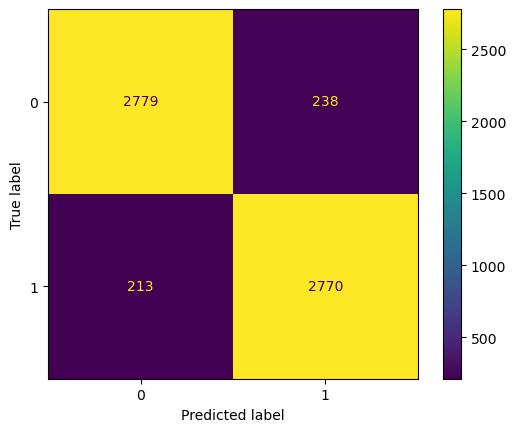

In [46]:
clf = svm.SVC(verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [129]:
tX_train, tX_test, ty_train, ty_test = train_test_split(features_test, label_test, test_size=0.3,random_state=42)

[LibSVM]Accuracy: 0.9175
Accuracy: 0.922225947033188


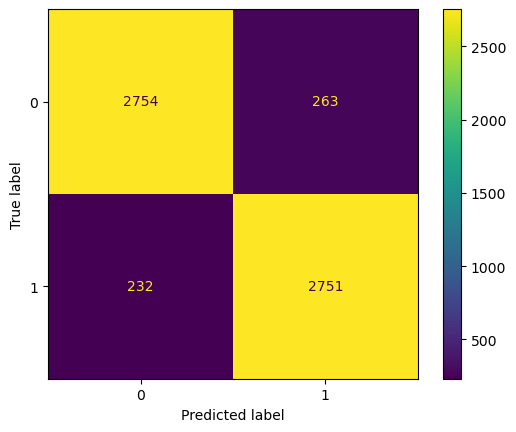

In [130]:
clf = svm.SVC(verbose=True)
clf.fit(tX_train, ty_train)
y_pred = clf.predict(tX_test)
print("Accuracy:",metrics.accuracy_score(ty_test, y_pred))
print("Accuracy:",metrics.recall_score(ty_test, y_pred))
conf_mat = confusion_matrix(ty_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

[LibSVM]Accuracy: 0.9213333333333333
Accuracy: 0.9255782769024472


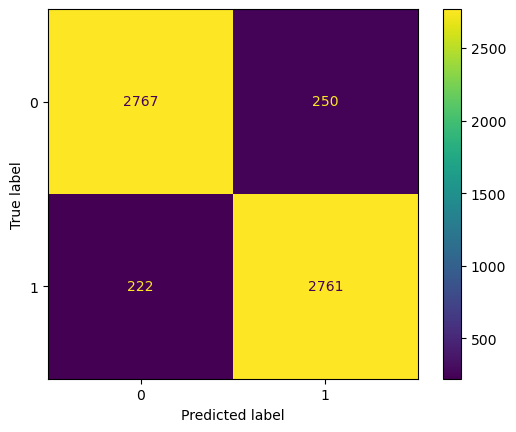

In [165]:
clf = svm.SVC(verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

[LibSVM]Accuracy: 0.5606666666666666
Accuracy: 0.18940663761314114


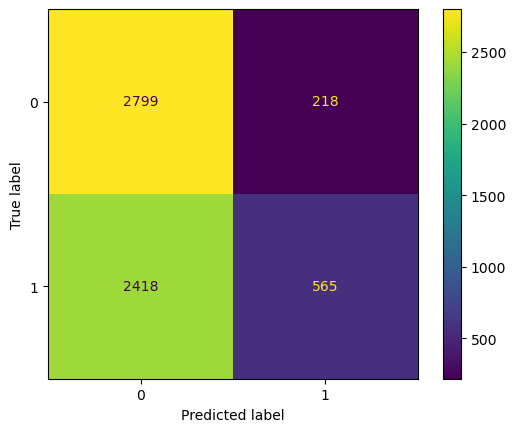

In [75]:
clf = svm.SVC(verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()